In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gym

## Model-Free RL

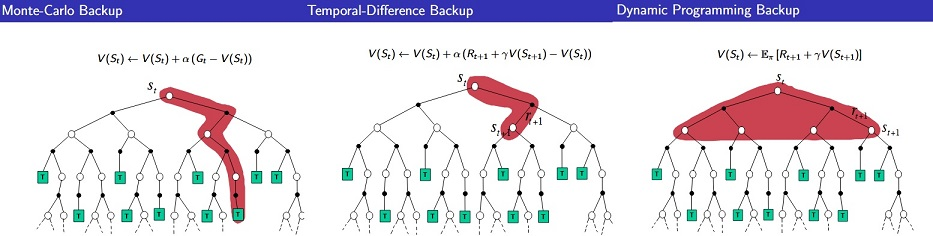

## Temporal Difference

## SARSA (TD control problem, On-Policy)

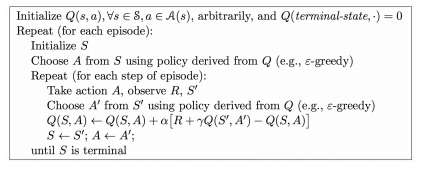

In [2]:
env = gym.make('Taxi-v3')

In [3]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [9]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: Q[(state,x)])

In [16]:
Q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        Q[(s,a)] = 0.0

In [17]:
alpha = 0.1
gamma = 0.99
epsilon = 0.01

In [18]:
rewards = []

for i in range(8000):
    
    # we store cumulative reward of each episodes in r
    r = 0
    
    # initialize the state,
    state = env.reset()
    
    # select the action using epsilon-greedy policy
    action = epsilon_greedy(state,epsilon)
    
    while True:
       
        # env.render()
        
        # then we perform the action and move to the next state, and receive the reward
        nextstate, reward, done, _ = env.step(action)
        
        # again, we select the next action using epsilon greedy policy
        nextaction = epsilon_greedy(nextstate,0) 
    
        # we calculate the Q value of previous state using our update rule
        Q[(state,action)] += alpha * (reward + gamma * Q[(nextstate,nextaction)]-Q[(state,action)])

        # finally we update our state and action with next action and next state
        action = nextaction
        state = nextstate
        
        # store the rewards
        r += reward
        
        # we will break the loop, if we are at the terminal state of the episode
        if done:
            break
    rewards.append(r)        
    #print("total reward: ", r)
    

env.close()

<AxesSubplot:>

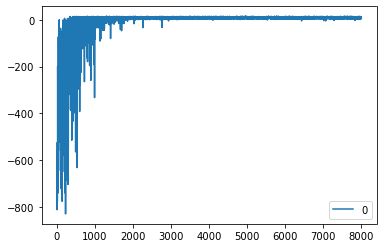

In [19]:
pd.DataFrame(rewards).plot()

## Q-learning (TD control problem, Off-Policy)
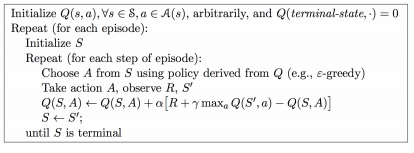

### Q-learning

In [9]:
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0

In [10]:
def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
    
    qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
    q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])

In [11]:
def epsilon_greedy_policy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: q[(state,x)])

In [12]:
alpha = 0.1
gamma = 0.99
epsilon = 0.01

In [13]:
rewards = []
for i in range(8000):
    r = 0
    prev_state = env.reset()
    while True:
        
        
        # env.render()
        
        # In each state, we select the action by epsilon-greedy policy
        action = epsilon_greedy_policy(prev_state, epsilon)
        
        # then we perform the action and move to the next state, and receive the reward
        nextstate, reward, done, _ = env.step(action)
        
        # Next we update the Q value using our update_q_table function
        # which updates the Q value by Q learning update rule
        
        update_q_table(prev_state, action, reward, nextstate, alpha, gamma)
        
        # Finally we update the previous state as next state
        prev_state = nextstate

        # Store all the rewards obtained
        r += reward

        #we will break the loop, if we are at the terminal state of the episode
        if done:
            break

    # print("total reward: ", r)
    rewards.append(r)
env.close()

<AxesSubplot:>

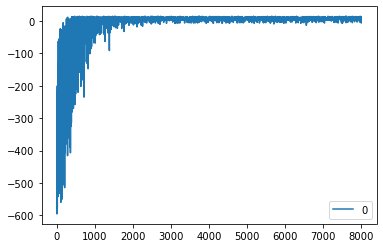

In [14]:
pd.DataFrame(rewards).plot()

## Mountain Car

[Environment](https://www.gymlibrary.ml/environments/classic_control/mountain_car/)

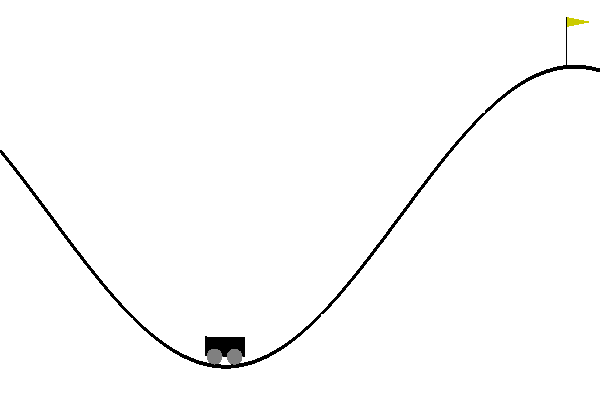

In [2]:
from tf_agents.environments import suite_gym
import PIL.Image
import pyvirtualdisplay

# display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

env_name = 'MountainCar-v0'
env = suite_gym.load(env_name)
env.reset()
PIL.Image.fromarray(env.render())

The mountain car environment provides the following discrete actions:

* 0 - Apply left force
* 1 - Apply no force
* 2 - Apply right force

The mountain car environment is made up of the following continuous values:

* state[0] - Position 
* state[1] - Velocity

The following code shows an agent that applies full throttle to climb the hill.  The cart is not strong enough.  It will need to use potential energy from the mountain behind it.

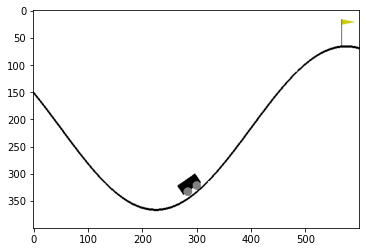

In [2]:
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

env = gym.make("MountainCar-v0")

env.reset()
done = False

i = 0
while not done:
    i += 1
    state, reward, done, _ = env.step(2)
    # env.render()
    
    print(f"Step {i}: State={state}, Reward={reward}")
plt.imshow(env.render(mode='rgb_array'))
display.display(plt.gcf())    
display.clear_output(wait=True)
env.close()

## A rule-based strategy

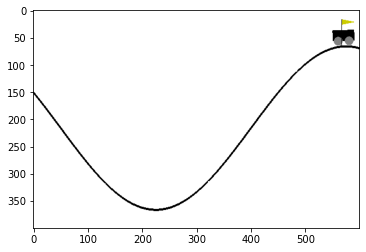

In [5]:
import gym
env = gym.make("MountainCar-v0")
  
state = env.reset()
done = False

i = 0
while not done:
    i += 1
    
    if state[1]>0:
        action = 2
    else:
        action = 0
    
    state, reward, done, _ = env.step(action)
    env.render()
    
    print(f"Step {i}: State={state}, Reward={reward}")
plt.imshow(env.render(mode='rgb_array'))
display.display(plt.gcf())    
display.clear_output(wait=True)
env.close()

## Q-learning

episode  100 score  -474.0 epsilon 0.010
episode  200 score  -314.0 epsilon 0.010
episode  300 score  -327.0 epsilon 0.010
episode  400 score  -229.0 epsilon 0.010
episode  500 score  -463.0 epsilon 0.010
episode  600 score  -406.0 epsilon 0.010
episode  700 score  -392.0 epsilon 0.010
episode  800 score  -161.0 epsilon 0.010
episode  900 score  -223.0 epsilon 0.010


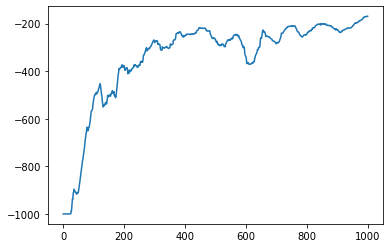

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from gym import wrappers
import pickle

pos_space = np.linspace(-1.2, 0.6, 12)
vel_space = np.linspace(-0.07, 0.07, 20)

# we need to descretize the state space
def get_state(observation):
    pos, vel =  observation
    pos_bin = int(np.digitize(pos, pos_space))
    vel_bin = int(np.digitize(vel, vel_space))

    return (pos_bin, vel_bin)

def max_action(Q, state, actions=[0, 1, 2]):
    values = np.array([Q[state,a] for a in actions])
    action = np.argmax(values)

    return action

if __name__ == '__main__':
    env = gym.make('MountainCar-v0')
    env._max_episode_steps = 1000
    n_games = 1000
    alpha = 0.1
    gamma = 0.99
    eps = 0.1

    action_space = [0, 1, 2]

    states = []
    for pos in range(21):
        for vel in range(21):
            states.append((pos, vel))

    Q = {}
    for state in states:
        for action in action_space:
            Q[state, action] = 0

    #pickle_in = open('mountaincar.pkl', 'rb')
    #Q = pickle.load(pickle_in)
    #env = wrappers.Monitor(env, "tmp/mountaincar",
                            #video_callable=lambda episode_id: True, force=True)
    score = 0
    total_rewards = np.zeros(n_games)
    for i in range(n_games):
        done = False
        obs = env.reset()
        state = get_state(obs)
        if i % 100 == 0 and i > 0:
            print('episode ', i, 'score ', score, 'epsilon %.3f' % eps)
        score = 0
        while not done:
            action = np.random.choice([0,1,2]) if np.random.random() < eps \
                    else max_action(Q, state)
            obs_, reward, done, info = env.step(action)
            state_ = get_state(obs_)
            score += reward
            action_ = max_action(Q, state_)
            Q[state, action] = Q[state, action] + \
                    alpha*(reward + gamma*Q[state_, action_] - Q[state, action])
            state = state_
        total_rewards[i] = score
        eps = eps - 2/n_games if eps > 0.01 else 0.01

    mean_rewards = np.zeros(n_games)
    for t in range(n_games):
        mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
    plt.plot(mean_rewards)
    plt.savefig('mountaincar.png')

    #f = open("mountaincar.pkl","wb")
    #pickle.dump(Q,f)
    #f.close()

## Function Approximation

## Deep Q-learning

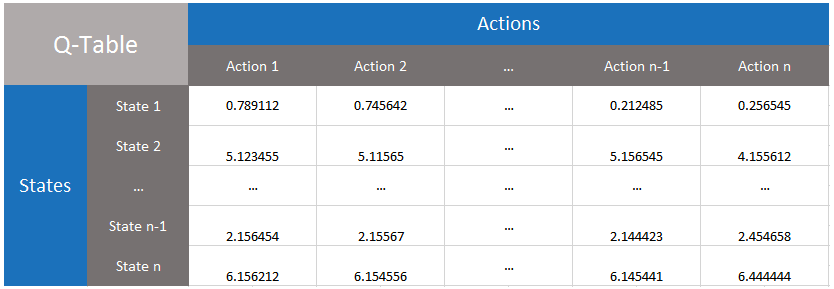

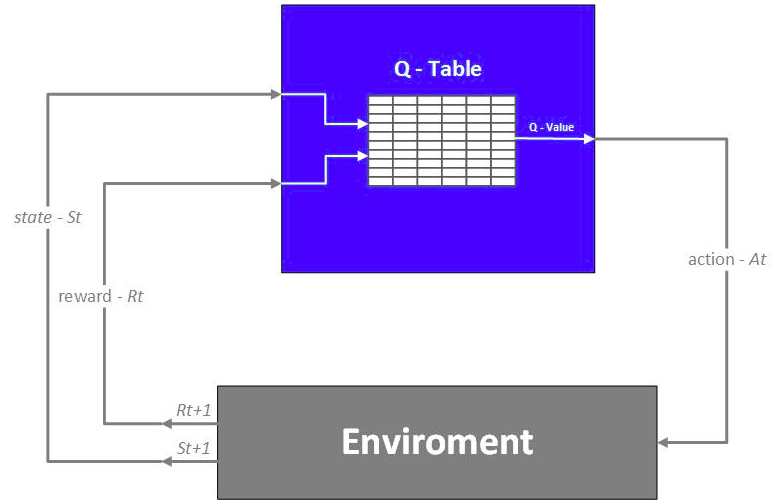

## Neural Network in Reinforcement Learning

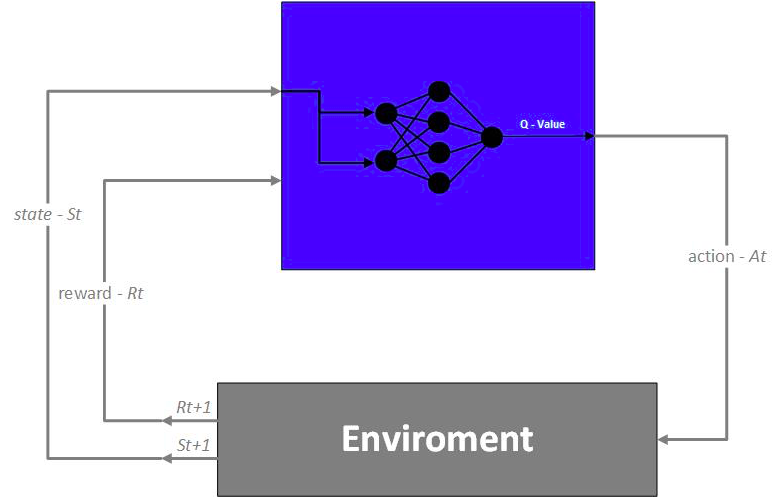

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gym

def plotLearning(x, scores, epsilons, filename, lines=None):
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Game", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t-20):(t+1)])

    ax2.scatter(x, running_avg, color="C1")
    #ax2.xaxis.tick_top()
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    #ax2.set_xlabel('x label 2', color="C1")
    ax2.set_ylabel('Score', color="C1")
    #ax2.xaxis.set_label_position('top')
    ax2.yaxis.set_label_position('right')
    #ax2.tick_params(axis='x', colors="C1")
    ax2.tick_params(axis='y', colors="C1")

    if lines is not None:
        for line in lines:
            plt.axvline(x=line)

    plt.savefig(filename)

## We use Keras

In [3]:
from keras.layers import Dense, Activation
from keras.models import Sequential, load_model
from keras.optimizers import Adam
import numpy as np

class ReplayBuffer(object):
    def __init__(self, max_size, input_shape, n_actions, discrete=False):
        self.mem_size = max_size
        self.mem_cntr = 0
        self.discrete = discrete
        self.state_memory = np.zeros((self.mem_size, input_shape))
        self.new_state_memory = np.zeros((self.mem_size, input_shape))
        dtype = np.int8 if self.discrete else np.float32
        self.action_memory = np.zeros((self.mem_size, n_actions), dtype=dtype)
        self.reward_memory = np.zeros(self.mem_size)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.float32)

    def store_transition(self, state, action, reward, state_, done):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        # store one hot encoding of actions, if appropriate
        if self.discrete:
            actions = np.zeros(self.action_memory.shape[1])
            actions[action] = 1.0
            self.action_memory[index] = actions
        else:
            self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.terminal_memory[index] = 1 - done
        self.mem_cntr += 1

    def sample_buffer(self, batch_size):
        max_mem = min(self.mem_cntr, self.mem_size)
        batch = np.random.choice(max_mem, batch_size)

        states = self.state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        states_ = self.new_state_memory[batch]
        terminal = self.terminal_memory[batch]

        return states, actions, rewards, states_, terminal

def build_dqn(lr, n_actions, input_dims, fc1_dims, fc2_dims):
    model = Sequential([
                Dense(fc1_dims, input_shape=(input_dims,)),
                Activation('relu'),
                Dense(fc2_dims),
                Activation('relu'),
                Dense(n_actions)])

    model.compile(optimizer=Adam(lr=lr), loss='mse')

    return model

class Agent(object):
    def __init__(self, alpha, gamma, n_actions, epsilon, batch_size,
                 input_dims, epsilon_dec=0.996,  epsilon_end=0.01,
                 mem_size=1000000, fname='dqn_model.h5'):
        self.action_space = [i for i in range(n_actions)]
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_dec = epsilon_dec
        self.epsilon_min = epsilon_end
        self.batch_size = batch_size
        self.model_file = fname
        self.memory = ReplayBuffer(mem_size, input_dims, n_actions,
                                   discrete=True)
        self.q_eval = build_dqn(alpha, n_actions, input_dims, 256, 256)

    def remember(self, state, action, reward, new_state, done):
        self.memory.store_transition(state, action, reward, new_state, done)

    def choose_action(self, state):
        state = state[np.newaxis, :]
        rand = np.random.random()
        if rand < self.epsilon:
            action = np.random.choice(self.action_space)
        else:
            actions = self.q_eval.predict(state)
            action = np.argmax(actions)

        return action

    def learn(self):
        if self.memory.mem_cntr > self.batch_size:
            state, action, reward, new_state, done = \
                                          self.memory.sample_buffer(self.batch_size)

            action_values = np.array(self.action_space, dtype=np.int8)
            action_indices = np.dot(action, action_values)

            q_eval = self.q_eval.predict(state)

            q_next = self.q_eval.predict(new_state)

            q_target = q_eval.copy()

            batch_index = np.arange(self.batch_size, dtype=np.int32)

            q_target[batch_index, action_indices] = reward + \
                                  self.gamma*np.max(q_next, axis=1)*done

            _ = self.q_eval.fit(state, q_target, verbose=0)

            self.epsilon = self.epsilon*self.epsilon_dec if self.epsilon > \
                           self.epsilon_min else self.epsilon_min

    def save_model(self):
        self.q_eval.save(self.model_file)

    def load_model(self):
        self.q_eval = load_model(self.model_file)

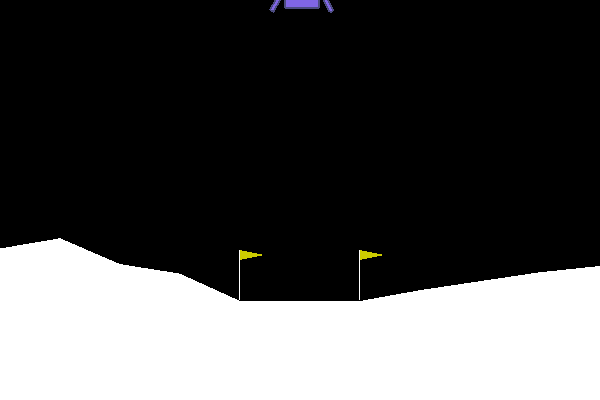

In [5]:
from tf_agents.environments import suite_gym
import PIL.Image
import pyvirtualdisplay

# display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

env_name = 'LunarLander-v2'
env = suite_gym.load(env_name)
env.reset()
PIL.Image.fromarray(env.render())

In [ ]:
#from simple_dqn_keras import Agent
import numpy as np
import gym
#from utils import plotLearning
from gym import wrappers

if __name__ == '__main__':
    env = gym.make('LunarLander-v2')
    lr = 0.001
    n_games = 10
    agent = Agent(gamma=0.99, epsilon=0.0, alpha=lr, input_dims=8,
                  n_actions=4, mem_size=1000000, batch_size=64, epsilon_end=0.0)

    # agent.load_model()
    scores = []
    eps_history = []

    #env = wrappers.Monitor(env, "tmp/lunar-lander-6",
    #                         video_callable=lambda episode_id: True, force=True)

    for i in range(n_games):
        done = False
        score = 0
        observation = env.reset()
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.remember(observation, action, reward, observation_, int(done))
            observation = observation_
            agent.learn()

        eps_history.append(agent.epsilon)
        scores.append(score)

        avg_score = np.mean(scores[max(0, i-100):(i+1)])
        print('episode: ', i,'score: %.2f' % score,
              ' average score %.2f' % avg_score)

        if i % 10 == 0 and i > 0:
            agent.save_model()

    filename = 'lunarlander.png'

    x = [i+1 for i in range(n_games)]
    plotLearning(x, scores, eps_history, filename)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


episode:  0 score: -488.88  average score -488.88
episode:  1 score: -382.67  average score -435.78
episode:  2 score: -452.16  average score -441.24
episode:  3 score: -205.53  average score -382.31
episode:  4 score: 2.41  average score -305.37
episode:  5 score: -1.55  average score -254.73
episode:  6 score: -46.72  average score -225.02


## DQN with target network

In [9]:
from keras.layers import Dense, Activation
from keras.models import Sequential, load_model
from keras.optimizers import Adam
import numpy as np

class ReplayBuffer(object):
    def __init__(self, max_size, input_shape, n_actions, discrete=False):
        self.mem_size = max_size
        self.mem_cntr = 0
        self.discrete = discrete
        self.state_memory = np.zeros((self.mem_size, input_shape))
        self.new_state_memory = np.zeros((self.mem_size, input_shape))
        dtype = np.int8 if self.discrete else np.float32
        self.action_memory = np.zeros((self.mem_size, n_actions), dtype=dtype)
        self.reward_memory = np.zeros(self.mem_size)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.float32)

    def store_transition(self, state, action, reward, state_, done):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        # store one hot encoding of actions, if appropriate
        if self.discrete:
            actions = np.zeros(self.action_memory.shape[1])
            actions[action] = 1.0
            self.action_memory[index] = actions
        else:
            self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.terminal_memory[index] = 1 - done
        self.mem_cntr += 1

    def sample_buffer(self, batch_size):
        max_mem = min(self.mem_cntr, self.mem_size)
        batch = np.random.choice(max_mem, batch_size)

        states = self.state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        states_ = self.new_state_memory[batch]
        terminal = self.terminal_memory[batch]

        return states, actions, rewards, states_, terminal

def build_dqn(lr, n_actions, input_dims, fc1_dims, fc2_dims):
    model = Sequential([
                Dense(fc1_dims, input_shape=(input_dims,)),
                Activation('relu'),
                Dense(fc2_dims),
                Activation('relu'),
                Dense(n_actions)])

    model.compile(optimizer=Adam(lr=lr), loss='mse')

    return model

class DDQNAgent(object):
    def __init__(self, alpha, gamma, n_actions, epsilon, batch_size,
                 input_dims, epsilon_dec=0.996,  epsilon_end=0.01,
                 mem_size=1000000, fname='ddqn_model.h5', replace_target=100):
        self.action_space = [i for i in range(n_actions)]
        self.n_actions = n_actions
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_dec = epsilon_dec
        self.epsilon_min = epsilon_end
        self.batch_size = batch_size
        self.model_file = fname
        self.replace_target = replace_target
        self.memory = ReplayBuffer(mem_size, input_dims, n_actions,
                                   discrete=True)
        self.q_eval = build_dqn(alpha, n_actions, input_dims, 256, 256)
        self.q_target = build_dqn(alpha, n_actions, input_dims, 256, 256)

    def remember(self, state, action, reward, new_state, done):
        self.memory.store_transition(state, action, reward, new_state, done)

    def choose_action(self, state):
        state = state[np.newaxis, :]
        rand = np.random.random()
        if rand < self.epsilon:
            action = np.random.choice(self.action_space)
        else:
            actions = self.q_eval.predict(state)
            action = np.argmax(actions)

        return action

    def learn(self):
        if self.memory.mem_cntr > self.batch_size:
            state, action, reward, new_state, done = \
                                          self.memory.sample_buffer(self.batch_size)

            action_values = np.array(self.action_space, dtype=np.int8)
            action_indices = np.dot(action, action_values)

            q_next = self.q_target.predict(new_state)
            q_eval = self.q_eval.predict(new_state)
            q_pred = self.q_eval.predict(state)

            max_actions = np.argmax(q_eval, axis=1)

            q_target = q_pred

            batch_index = np.arange(self.batch_size, dtype=np.int32)

            q_target[batch_index, action_indices] = reward + \
                    self.gamma*q_next[batch_index, max_actions.astype(int)]*done

            _ = self.q_eval.fit(state, q_target, verbose=0)

            self.epsilon = self.epsilon*self.epsilon_dec if self.epsilon > \
                           self.epsilon_min else self.epsilon_min
            if self.memory.mem_cntr % self.replace_target == 0:
                self.update_network_parameters()

    def update_network_parameters(self):
        self.q_target.set_weights(self.q_eval.get_weights())

    def save_model(self):
        self.q_eval.save(self.model_file)

    def load_model(self):
        self.q_eval = load_model(self.model_file)
        # if we are in evaluation mode we want to use the best weights for
        # q_target
        if self.epsilon == 0.0:
            self.update_network_parameters()

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


episode:  0 score: -376.26  average score -376.26
episode:  1 score: -46.39  average score -211.33
episode:  2 score: -190.18  average score -204.28
episode:  3 score: -165.51  average score -194.59
episode:  4 score: -48.25  average score -165.32
episode:  5 score: -241.14  average score -177.96
episode:  6 score: -220.42  average score -184.02
episode:  7 score: -6.93  average score -161.89
episode:  8 score: -54.83  average score -149.99
episode:  9 score: -108.64  average score -145.86


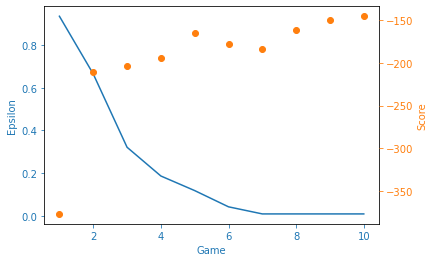

In [10]:
import os
# for keras the CUDA commands must come before importing the keras libraries
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import gym
from gym import wrappers
import numpy as np
# from ddqn_keras import DDQNAgent
# from utils import plotLearning

if __name__ == '__main__':
    env = gym.make('LunarLander-v2')
    ddqn_agent = DDQNAgent(alpha=0.001, gamma=0.99, n_actions=4, epsilon=1.0,
                  batch_size=64, input_dims=8)
    n_games = 10
    #ddqn_agent.load_model()
    ddqn_scores = []
    eps_history = []
    #env = wrappers.Monitor(env, "tmp/lunar-lander-ddqn-2",
    #                         video_callable=lambda episode_id: True, force=True)

    for i in range(n_games):
        done = False
        score = 0
        observation = env.reset()
        while not done:
            action = ddqn_agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            ddqn_agent.remember(observation, action, reward, observation_, int(done))
            observation = observation_
            ddqn_agent.learn()
        eps_history.append(ddqn_agent.epsilon)

        ddqn_scores.append(score)

        avg_score = np.mean(ddqn_scores[max(0, i-100):(i+1)])
        print('episode: ', i,'score: %.2f' % score,
              ' average score %.2f' % avg_score)

        if i % 10 == 0 and i > 0:
            ddqn_agent.save_model()

    filename = 'lunarlander-ddqn.png'

    x = [i+1 for i in range(n_games)]
    plotLearning(x, ddqn_scores, eps_history, filename)

## Choosing a Deep RL library
<a href="https://medium.com/data-from-the-trenches/choosing-a-deep-reinforcement-learning-library-890fb0307092"> Some important libraries </a>